In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
FS = (10, 8)

### Demeaning then smoothing or the other way round?
Give a time series $x_t$, and window lengths $M, N$, we want to understand the difference between the following two procedures.

1. First demean $x_t$ using an $M$-point moving average and then take an $N$-point moving average to smooth the result.
2. First smooth $x_t$ by using an $N$-point moving average and then demain the result using an $M$-point moving average.

To set the notation, let $x_t$ be a discrete time series of length $n$, that is the subscript $t$ belongs to the set $\{0, 1, \ldots, n-1\}$.

The $M$-point moving average of $x_t$ can be described as a linear operator on $x_t$, in other words by a matrix multiplication. If $y_t$ is the $M$-point moving average of $x_t$, we have:

\begin{align*}
y_t = A_{M} x_t,
\end{align*}

where $A_{M}$ is $n \times n$ banded 
matrix with ones on the top $M$ diagonals
scaled by $1/M$. For example, if all 
our time series are of lenght $n=5$, then,

\begin{align*}
A_{3} =
\frac{1}{3}
\begin{bmatrix}
1 & 1 & 1 & 0 & 0\\
0 & 1 & 1 & 1 & 0\\
0 & 0 & 1 & 1 & 1\\
0 & 0 & 0 & 1 & 1\\
0 & 0 & 0 & 0 & 1
\end{bmatrix}
\end{align*}

Note that instead of a weighted moving average, the structure of the above matrix would remain the same, the weights will occupy the non-zero entries in the matrix above. 


With the notation above, let $y^{sd}_t$ be the series obtained by first demeaning and then smoothing:

\begin{align*}
y^{sd} &= A_{N}(x_t - A_{M}x_t)\\
&= A_{N}x_t - A_{N}A_{M}x_t,
\end{align*}

while $y^{ds}$, which is $N$-point smoothing of $x_t$ followed be $M$-point moving 
average demeaning of the smoothened result, is given by

\begin{align*}
y^{ds} &= A_{N}(x_t) - A_{M}(A_{N}x_t)\\
&= A_{N}x_t - A_{M}A_{N}x_t,
\end{align*}

The difference betweent the two approaches boils down to wether $A_{N}$ and $A_{M}$
commute or not:

\begin{align*}
y^{sd} - y^{ds} &= A_{N}A_{M}x_t - A_{M}A_{N}x_t \\
                &= (A_{N}A_{M} - A_{M}A_{N})x_t \\
\end{align*}

In general, the moving average matrices do not commute:

\begin{align*}
A_{N}A_{M} \neq A_{M}A_{N}
\end{align*}

The following code produces $A_M$ of size $n \times n$:

In [7]:
def moving_average_matrix(n, M):
    """Moving average matrix. Assumes that the 
    time series on which this matrix will be applied has 
    total length n to compute M point averages.
    
    returns a n x n matrix with non zero entries in the M diagonals
    """
    assert M <= n
    out = np.zeros((n, n))
    
    # 1. this method has all zeros in the last M - 1 rows
    #  for k in range(n-M+1):
    #   out[k, k:k+M] = np.ones(M)
    #  return 1.0 / M * out

    # 2. This method slowly builds the moving average for the first M-1 points
    for k in range(M):
        out = out + np.diag(np.ones(n-k), k)
    
    for k in range(n):
        out[k, :] = out[k, :] / np.sum(out[k, :])
    return out


As an example, we create a $5 \times 5$ matrix for a $3$-point average:

In [9]:
n, M = 5, 3
A = moving_average_matrix(n, M)
A

array([[0.33333333, 0.33333333, 0.33333333, 0.        , 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.33333333, 0.33333333, 0.33333333],
       [0.        , 0.        , 0.        , 0.5       , 0.5       ],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

The operator $A_{M}A_{N} - A_{N}A_{M}$ is not exactly zero but quite sparse:

In [91]:
A = lambda M: moving_average_matrix(10, M)
D = A(6) @ A(3) - A(3) @ A(6)

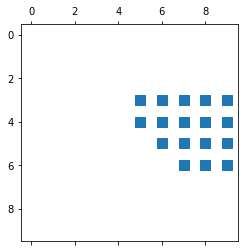

In [94]:
import scipy.sparse as sps
Ds = sps.csr_matrix(D)
plt.spy(Ds)
plt.show()

To apply the moving point average on a time series $x_t$, we just have to say:

In [80]:
n = 100
x = np.cumsum(np.random.randn(n))
A = lambda M: moving_average_matrix(n, M)
M = 10
ma_x = np.flipud(A(M) @ np.flipud(x))

The original time series and its moving average

In [81]:
x, ma_x

(array([-0.57024453, -1.12919751, -0.52539852, -0.73204579, -1.62523122,
        -0.97526384, -2.34991357, -1.34638643, -2.72864145, -2.33115081,
        -4.36644832, -4.71687347, -2.84990678, -2.72607952, -2.64492266,
        -1.56559314, -3.08074312, -3.53939619, -4.35438364, -4.64943528,
        -4.08082687, -3.61062102, -4.94939501, -3.8441216 , -2.83827545,
        -2.28290643, -2.7657129 , -1.67393723, -2.35009028, -0.47301348,
         0.23921957, -0.16372768, -0.53188004,  0.58786014, -0.07248222,
        -0.91891821, -0.28475358, -0.4455114 , -0.82085316, -1.66525499,
        -1.98229546, -1.02455745, -0.99940694, -0.40656205, -0.86116795,
        -3.00729071, -4.7394836 , -4.81009694, -3.11158697, -2.28244403,
        -2.70891769, -2.36014052, -2.66571912, -0.51906272, -1.39456024,
        -1.73027346, -0.63437927, -0.66737753,  0.21069405,  1.23311324,
         1.68419366,  1.27550706,  0.56184121,  3.16389261,  3.94175668,
         4.55387813,  3.95398826,  5.77995926,  5.3

And a plot of the two

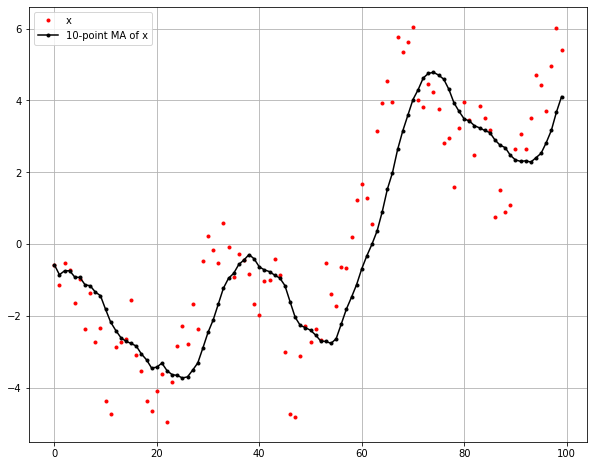

In [82]:
plt.figure(figsize=FS)
plt.plot(np.arange(n), x, 'r.', np.arange(n), ma_x, 'k.-')
plt.legend(['x', f'{M}-point MA of x'])
plt.grid(True)

Now let's compute $y^{sd}$ and $y^{ds}$, with demeaning window $M$ and smoothing 
window $N$.

In [83]:
MA = lambda x, M: np.flipud(moving_average_matrix(n, M) @ np.flipud(x))
M, N = 30, 40
ysd = MA(x - MA(x, M), N)
yds = MA(x, N) - MA(MA(x, N), M)

In [84]:
ysd, yds

(array([ 0.00000000e+00, -1.39738245e-01, -2.10871645e-02, -1.40214251e-02,
        -1.52978681e-01, -1.35654502e-01, -2.90603859e-01, -2.77987909e-01,
        -4.02352834e-01, -4.52097896e-01, -6.53568414e-01, -8.29699423e-01,
        -8.29794058e-01, -8.17422704e-01, -7.98732904e-01, -7.17039413e-01,
        -7.30599698e-01, -7.63793833e-01, -8.30451412e-01, -8.99382466e-01,
        -9.30952193e-01, -9.36022462e-01, -9.94357944e-01, -9.99743548e-01,
        -9.64276030e-01, -9.10830747e-01, -8.79147212e-01, -8.12056738e-01,
        -7.73293159e-01, -6.76976996e-01, -5.64769911e-01, -4.73173568e-01,
        -3.98278104e-01, -2.96148746e-01, -2.20201085e-01, -1.72037021e-01,
        -1.11197339e-01, -5.85804567e-02, -1.99166118e-02, -4.85091801e-03,
        -1.95945267e-04,  3.23124599e-02,  5.15152574e-02,  8.88322260e-02,
         1.31197172e-01,  1.04616112e-01,  6.53941731e-02, -2.99775849e-04,
         5.62326014e-03,  1.78656572e-02,  6.25147090e-02,  1.17312796e-01,
         1.1

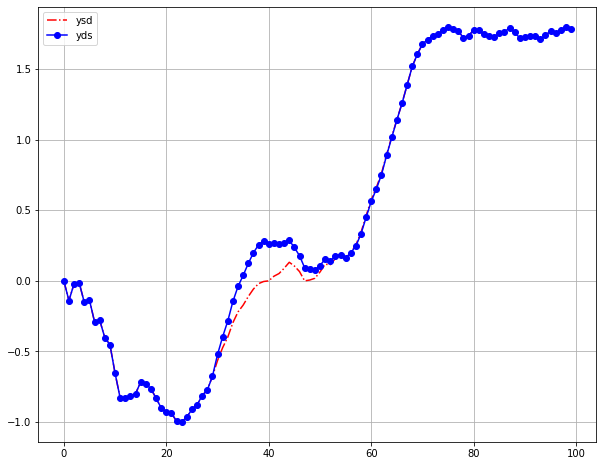

In [85]:
plt.figure(figsize=FS)
plt.plot(np.arange(n), ysd, 'r-.', np.arange(n), yds, 'b-o')
plt.legend(['ysd', 'yds'])
plt.grid(True)

Let's also look at the difference

Text(0.5, 1.0, 'ysd - yds')

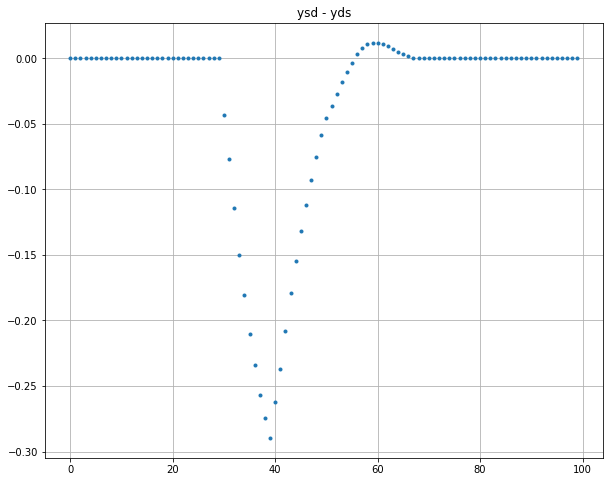

In [87]:
plt.figure(figsize=FS)
plt.plot(np.arange(n), ysd - yds, '.')
plt.grid(True)
plt.title('ysd - yds')

In [88]:
np.abs(ysd - yds) > 1e-10

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

It's quite interesting to see the operator $A_{M}A_{N} - A_{N}A_{M}$. It's largely sparse, with
very few entries contrubuting to the difference. 

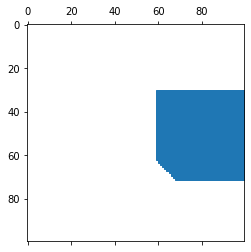

In [90]:
A = lambda M: moving_average_matrix(len(x), M)
D = A(M)@A(N) - A(N)@A(M)
Ds = sps.csr_matrix(D)
plt.spy(Ds)
plt.show()